In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [231]:
x,y=make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)
x.shape,y.shape
#print(y)

((500, 2), (500,))

In [250]:
y

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

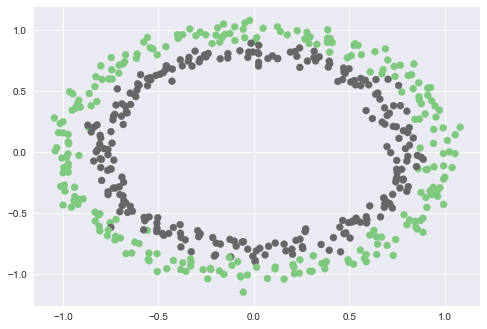

In [232]:
plt.style.use("seaborn")
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [233]:
def softmax(a):
    e_p=np.exp(a)
    ans=e_p/np.sum(e_p,axis=1,keepdims=True)
    return ans

In [234]:
class Neuralnetwark:
    def __init__(self,input_size,layers,output_size):
        
        np.random.seed(0)
        model={}
        
        model["w1"]=np.random.randn(input_size,layers[0])
        model["b1"]=np.zeros((1,layers[0]))
        
        model["w2"]=np.random.randn(layers[0],layers[1])
        model["b2"]=np.zeros((1,layers[1]))
        
        model["w3"]=np.random.randn(layers[1],output_size)
        model["b3"]=np.zeros((1,output_size))
                             
        self.model=model
                                                        
                             
    def forward(self,x):
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
      
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3)+b3
        y_=softmax(z3)
        
        self.activation_output=(a1,a2,y_)
        return y_
    
   
    def backward(self,x,y,learning_rate=0.001):
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
        m=x.shape[0]
        
        a1,a2,y_=self.activation_output
        
        delta3=y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=((1-np.square(a2))*np.dot(delta3,w3.T))
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=((1-np.square(a1))*np.dot(delta2,w2.T))
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        self.model["w1"]-=learning_rate*dw1
        self.model["b1"]-=learning_rate*db1
        self.model["w2"]-=learning_rate*dw2
        self.model["b2"]-=learning_rate*db2
        self.model["w3"]-=learning_rate*dw3
        self.model["b3"]-=learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        w1,w2,w3=self.model["w1"],self.model["w2"],self.model["w3"]
        a1,a2,y_=self.activation_output
        print("w1",w1.shape)
        print("a1",a1.shape)
        print("w2",w2.shape)
        print("a2",a2.shape)
        print("w3",w3.shape)
        print("y_",y_.shape)

In [235]:
def loss(y_out,p):
    l=-np.mean(y_out*np.log(p))
    return l

In [236]:
def one_hot(y,depth):
    m=y.shape[0]
    y_out=np.zeros((m,depth))
    y_out[np.arange(m),y]=1
    return y_out

In [237]:
model=Neuralnetwark(input_size=2,layers=[10,5],output_size=2)


In [238]:
y_out=one_hot(y,3)
y_out

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [239]:
y_=model.forward(x)
y_

array([[0.55194332, 0.44805668],
       [0.33167157, 0.66832843],
       [0.57653141, 0.42346859],
       [0.34687297, 0.65312703],
       [0.61867246, 0.38132754],
       [0.58503885, 0.41496115],
       [0.47183242, 0.52816758],
       [0.56202089, 0.43797911],
       [0.55948116, 0.44051884],
       [0.35852707, 0.64147293],
       [0.35625852, 0.64374148],
       [0.42484217, 0.57515783],
       [0.42724561, 0.57275439],
       [0.40134005, 0.59865995],
       [0.5457912 , 0.4542088 ],
       [0.48628249, 0.51371751],
       [0.51508627, 0.48491373],
       [0.56442427, 0.43557573],
       [0.44691487, 0.55308513],
       [0.44282048, 0.55717952],
       [0.56647661, 0.43352339],
       [0.50944887, 0.49055113],
       [0.45875367, 0.54124633],
       [0.58171721, 0.41828279],
       [0.43446665, 0.56553335],
       [0.43437173, 0.56562827],
       [0.56393344, 0.43606656],
       [0.35497999, 0.64502001],
       [0.42287443, 0.57712557],
       [0.71805694, 0.28194306],
       [0.

In [240]:
model.summary()

w1 (2, 10)
a1 (500, 10)
w2 (10, 5)
a2 (500, 5)
w3 (5, 2)
y_ (500, 2)


In [241]:
def train(x,y,model,epoch,learning_rate,logs=True):
    training_loss=[]
    classes=2
    y_out=one_hot(y,classes)
    for ix in range(epoch):
        y_=model.forward(x)
        l=loss(y_out,y_)
        training_loss.append(l)
        model.backward(x,y_out,learning_rate)
        
        if logs:
            print("epoch %d loss %.4f"%(ix,l))
    return training_loss

In [242]:
losses=train(x,y,model,500,0.001)
losses

epoch 0 loss 0.3584
epoch 1 loss 0.3486
epoch 2 loss 0.3480
epoch 3 loss 0.3478
epoch 4 loss 0.3476
epoch 5 loss 0.3475
epoch 6 loss 0.3474
epoch 7 loss 0.3473
epoch 8 loss 0.3472
epoch 9 loss 0.3472
epoch 10 loss 0.3471
epoch 11 loss 0.3471
epoch 12 loss 0.3470
epoch 13 loss 0.3470
epoch 14 loss 0.3469
epoch 15 loss 0.3469
epoch 16 loss 0.3469
epoch 17 loss 0.3469
epoch 18 loss 0.3468
epoch 19 loss 0.3468
epoch 20 loss 0.3468
epoch 21 loss 0.3468
epoch 22 loss 0.3467
epoch 23 loss 0.3467
epoch 24 loss 0.3467
epoch 25 loss 0.3467
epoch 26 loss 0.3467
epoch 27 loss 0.3466
epoch 28 loss 0.3466
epoch 29 loss 0.3466
epoch 30 loss 0.3466
epoch 31 loss 0.3466
epoch 32 loss 0.3466
epoch 33 loss 0.3465
epoch 34 loss 0.3465
epoch 35 loss 0.3465
epoch 36 loss 0.3465
epoch 37 loss 0.3465
epoch 38 loss 0.3465
epoch 39 loss 0.3464
epoch 40 loss 0.3464
epoch 41 loss 0.3464
epoch 42 loss 0.3464
epoch 43 loss 0.3464
epoch 44 loss 0.3464
epoch 45 loss 0.3464
epoch 46 loss 0.3463
epoch 47 loss 0.3463
ep

epoch 409 loss 0.3423
epoch 410 loss 0.3422
epoch 411 loss 0.3422
epoch 412 loss 0.3422
epoch 413 loss 0.3422
epoch 414 loss 0.3422
epoch 415 loss 0.3422
epoch 416 loss 0.3421
epoch 417 loss 0.3421
epoch 418 loss 0.3421
epoch 419 loss 0.3421
epoch 420 loss 0.3421
epoch 421 loss 0.3420
epoch 422 loss 0.3420
epoch 423 loss 0.3420
epoch 424 loss 0.3420
epoch 425 loss 0.3420
epoch 426 loss 0.3419
epoch 427 loss 0.3419
epoch 428 loss 0.3419
epoch 429 loss 0.3419
epoch 430 loss 0.3419
epoch 431 loss 0.3419
epoch 432 loss 0.3418
epoch 433 loss 0.3418
epoch 434 loss 0.3418
epoch 435 loss 0.3418
epoch 436 loss 0.3418
epoch 437 loss 0.3417
epoch 438 loss 0.3417
epoch 439 loss 0.3417
epoch 440 loss 0.3417
epoch 441 loss 0.3417
epoch 442 loss 0.3416
epoch 443 loss 0.3416
epoch 444 loss 0.3416
epoch 445 loss 0.3416
epoch 446 loss 0.3416
epoch 447 loss 0.3415
epoch 448 loss 0.3415
epoch 449 loss 0.3415
epoch 450 loss 0.3415
epoch 451 loss 0.3415
epoch 452 loss 0.3414
epoch 453 loss 0.3414
epoch 454 

[0.3584061868870557,
 0.3485943931378937,
 0.34799384137380623,
 0.34778973536774527,
 0.34763256999157227,
 0.34750364696669894,
 0.3473967485659874,
 0.3473072759535448,
 0.3472316242747929,
 0.34716696136223607,
 0.3471110604890914,
 0.34706216921044386,
 0.34701890655629813,
 0.3469801825931837,
 0.34694513554959316,
 0.34691308268840915,
 0.34688348191646706,
 0.34685590177049286,
 0.3468299979344032,
 0.3468054948493201,
 0.3467821712959951,
 0.3467598490777776,
 0.346738384125665,
 0.3467176594973183,
 0.34669757985871846,
 0.3466780671278477,
 0.34665905703025274,
 0.3466404963711225,
 0.34662234087112326,
 0.3466045534464096,
 0.34658710283908567,
 0.34656996252456473,
 0.3465531098380355,
 0.3465365252745639,
 0.34652019192701294,
 0.3465040950335251,
 0.3464882216122505,
 0.34647256016567207,
 0.3464571004405464,
 0.3464418332323771,
 0.34642675022561403,
 0.3464118438625774,
 0.34639710723552697,
 0.34638253399742924,
 0.3463681182878633,
 0.34635385467122237,
 0.3463397380

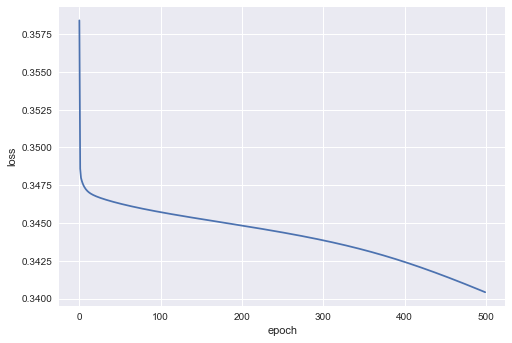

In [243]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
from visualize import plot_decision_boundry
plot_decision_boundry(lambda x:model.predict(x),x,y)

In [246]:
output=model.predict(x)
output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,